In [60]:
import pandas as pd
import plotly.express as px

path = "../data/raw/Citizenship Education/citizenship_education.csv"

df = pd.read_csv(path)
df

,Country,Primary,Lower Secondary,Higher Secondary
0,BE,25.0,0.0,0.0
1,BG,0.0,0.0,12.6
2,EE,4.4,26.3,26.3
3,IE,0.0,23.0,0.0
4,EL,7.0,18.7,31.3
5,ES,5.8,11.7,0.0
6,FR,36.0,18.0,18.0
7,HR,0.0,0.0,6.6
8,CY,0.0,0.0,7.5
9,LT,0.0,8.8,0.0


In [61]:
#adding a column with the total hours

df['Total Hours'] = df.sum(axis = 1, numeric_only = True)
df

,Country,Primary,Lower Secondary,Higher Secondary,Total Hours
0,BE,25.0,0.0,0.0,25.0
1,BG,0.0,0.0,12.6,12.6
2,EE,4.4,26.3,26.3,57.0
3,IE,0.0,23.0,0.0,23.0
4,EL,7.0,18.7,31.3,57.0
5,ES,5.8,11.7,0.0,17.5
6,FR,36.0,18.0,18.0,72.0
7,HR,0.0,0.0,6.6,6.6
8,CY,0.0,0.0,7.5,7.5
9,LT,0.0,8.8,0.0,8.8


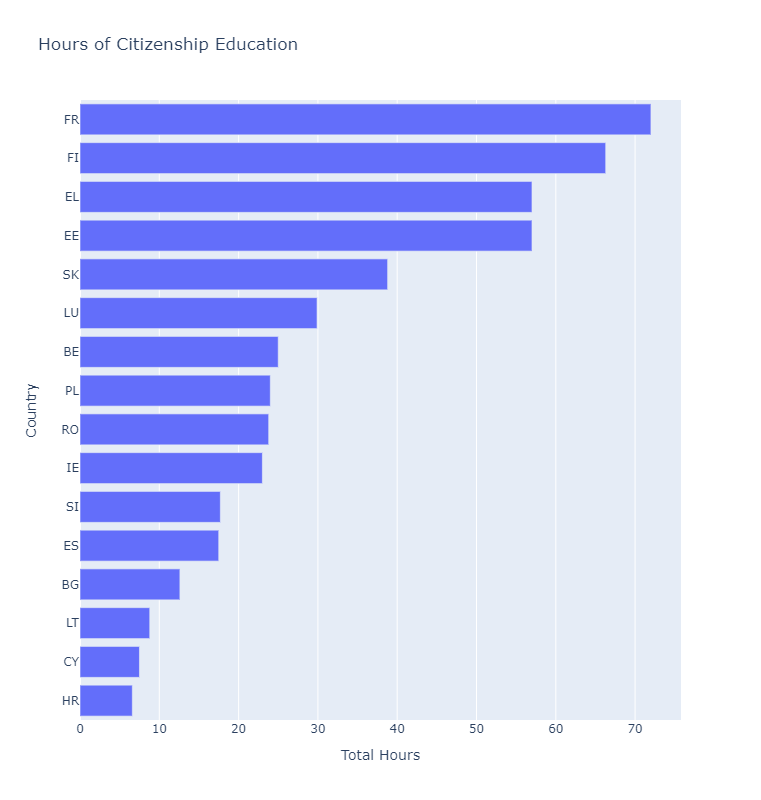

In [62]:
fig = px.bar(df, y = 'Country', x = 'Total Hours',
             width = 600, height = 800,
             title = 'Hours of Citizenship Education')

fig.update_layout(yaxis_categoryorder = 'total ascending')

fig.show()

In [63]:
#converting the dataframe from long to wide format 
#so we can create a stacked bar chart
cols = ['Country', 'Primary', 'Lower Secondary', 'Higher Secondary']

df_long = df[cols].melt(id_vars = ['Country'])
df_long.rename(columns = {'value': 'Hours'}, inplace = True)
                        
df_long

,Country,variable,Hours
0,BE,Primary,25.0
1,BG,Primary,0.0
2,EE,Primary,4.4
3,IE,Primary,0.0
4,EL,Primary,7.0
5,ES,Primary,5.8
6,FR,Primary,36.0
7,HR,Primary,0.0
8,CY,Primary,0.0
9,LT,Primary,0.0


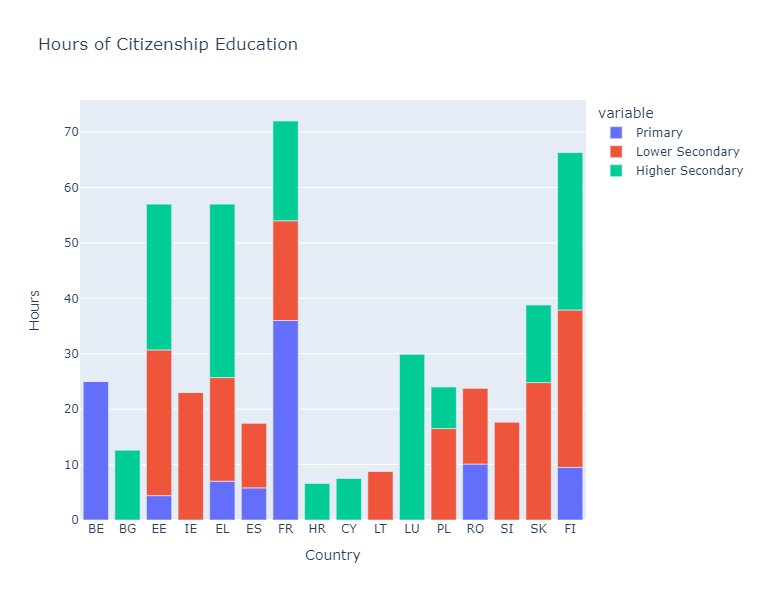

In [64]:
fig = px.bar(df_long, x = 'Country', y = 'Hours', color = 'variable',
             width = 800, height = 600,
             title = 'Hours of Citizenship Education')

fig.update_layout(yaxis_categoryorder = 'total ascending')

fig.show()

In [65]:
#saving the dataframe to CSV
path = "../data/clean/Citizenship Education/citizenship_education.csv"

df.to_csv(path, index = False, float_format = '%.1f')